In [1]:
import os
import sys
import warnings

import pdb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from xgboost import XGBRegressor

from sklearn import tree

from utils import MySet

from utils import local_data
from utils import window
from utils import Scale, give_error
from utils import generate_and_avaliate_model

from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise_update.pkl')

In [3]:
df.columns

Index(['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2',
       'gvtec2_dt', 'state_night', 'state_dawn', 'vm1', 'vd1', 'vm2', 'vd2',
       'gvtec1_dt_lag_9', 'gvtec2_dt_lag_20', 'vtec_dt_lag_3', 's4'],
      dtype='object')

In [4]:
original = MySet('original', ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'])
tempo  = MySet('tempo', ['state_night', 'state_dawn'])
mdv1 = MySet('mdv1', ['vm1', 'vd1'])
mdv2 = MySet('mdv2', ['vm2', 'vd2'])
lag = MySet('lag', ['gvtec1_dt_lag_9', 'gvtec2_dt_lag_20'])

vtec = MySet('vtec', ['vtec'])
vtec_dt = MySet('vtec_dt', ['vtec_dt'])
vtec_dt2 = MySet('vtec_dt2', ['vtec_dt2'])
gvtec1 = MySet('gvtec1', ['gvtec1'])
gvtec1_dt = MySet('gvtec1_dt', ['gvtec1_dt'])
gvtec2 = MySet('gvtec2', ['gvtec2'])
gvtec2_dt = MySet('gvtec2_dt', ['gvtec2_dt'])
state_night = MySet('state_night', ['state_night'])
state_dawn = MySet('state_dawn', ['state_dawn'])
vm1 = MySet('vm1', ['vm1'])
vd1 = MySet('vd1', ['vd1'])
vm2 = MySet('vm2', ['vm2'])
vd2 = MySet('vd2', ['vd2'])
gvtec1_dt_lag_9 = MySet('gvtec1_dt_lag_9', ['gvtec1_dt_lag_9'])
gvtec2_dt_lag_20 = MySet('gvtec2_dt_lag_20', ['gvtec2_dt_lag_20'])

In [5]:
set_tests = [original,
             original-vtec,
             original-vtec_dt,
             original-gvtec1,
             original-gvtec1_dt,
             original-gvtec2,
             original-gvtec2_dt,
             original+tempo,
             original+gvtec1_dt_lag_9,
             original+gvtec2_dt_lag_20,
             original+lag,
             original+mdv1,
             original+mdv2,
             original+tempo+lag,
             original+tempo+mdv2,
             original+tempo+mdv2+lag,
             original+tempo+lag+mdv1+mdv2,
             vtec,
             vtec+gvtec1_dt_lag_9,
             vtec+gvtec2_dt_lag_20,
             vtec+vtec_dt+vtec_dt2,
             vtec+gvtec1+gvtec2,
             vtec+tempo,
             vtec+tempo+mdv1,
             vtec+tempo+lag,
             vtec+tempo+lag+mdv1,
             vtec+tempo+lag+mdv2,
             vtec+tempo+lag+mdv1+mdv2]

original
Error for the time series sample:
acc             0.871936
f1              0.490779
far             0.334853
fn             54.200000
fp             17.900000
kappa           0.080025
me              0.373095
mse             0.004464
pod             0.391011
precission      0.665147
re             23.125076
recall          0.391011
tn            456.100000
tp             34.800000
tse             1.585025
dtype: float64


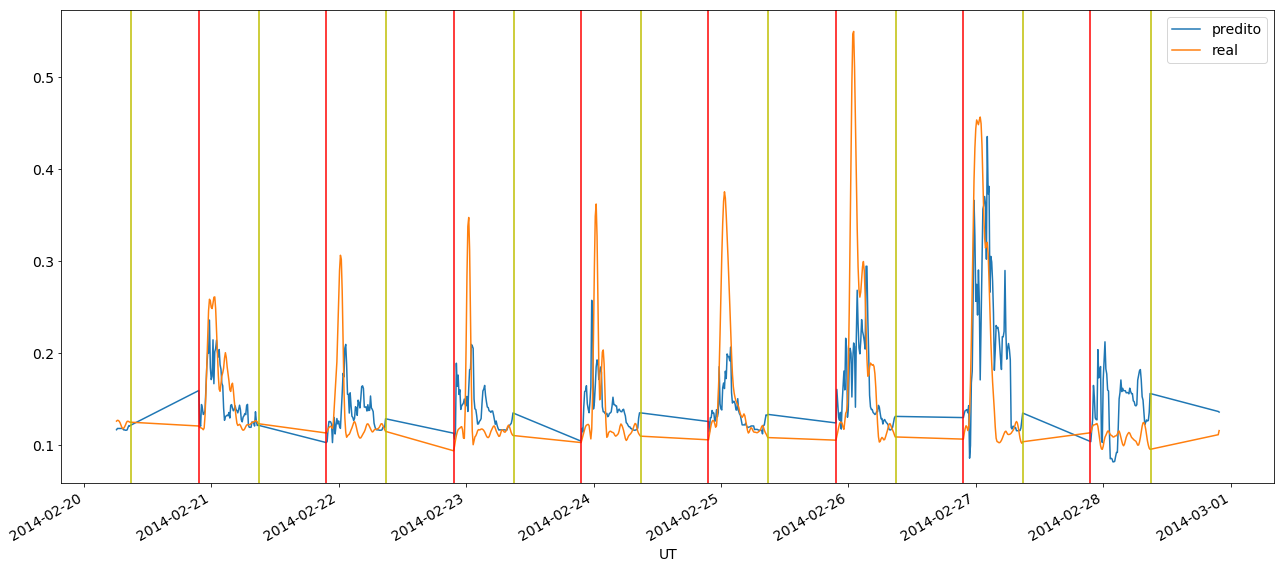


original - vtec
Error for the time series sample:
acc             0.857016
f1              0.540268
far             0.450012
fn             41.600000
fp             38.900000
kappa           0.062966
me              0.333552
mse             0.004791
pod             0.532584
precission      0.549988
re             30.093488
recall          0.532584
tn            435.100000
tp             47.400000
tse             1.642184
dtype: float64


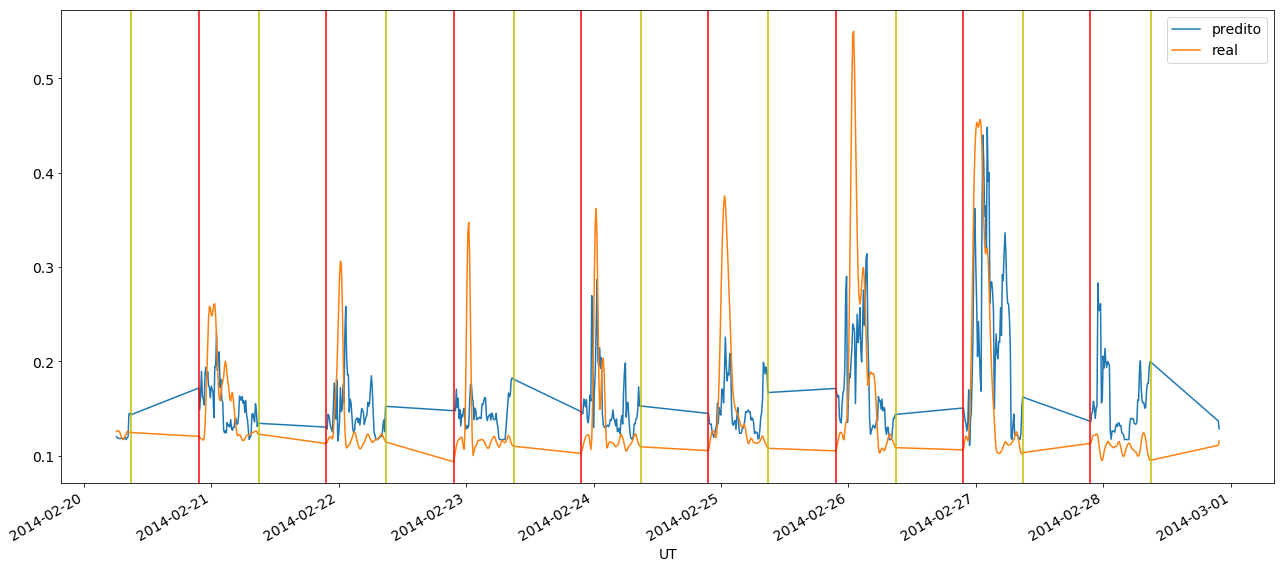


original - vtec_dt
Error for the time series sample:
acc             0.877265
f1              0.521939
far             0.320923
fn             51.200000
fp             17.900000
kappa           0.075800
me              0.360408
mse             0.004505
pod             0.424719
precission      0.679077
re             23.385980
recall          0.424719
tn            456.100000
tp             37.800000
tse             1.592292
dtype: float64


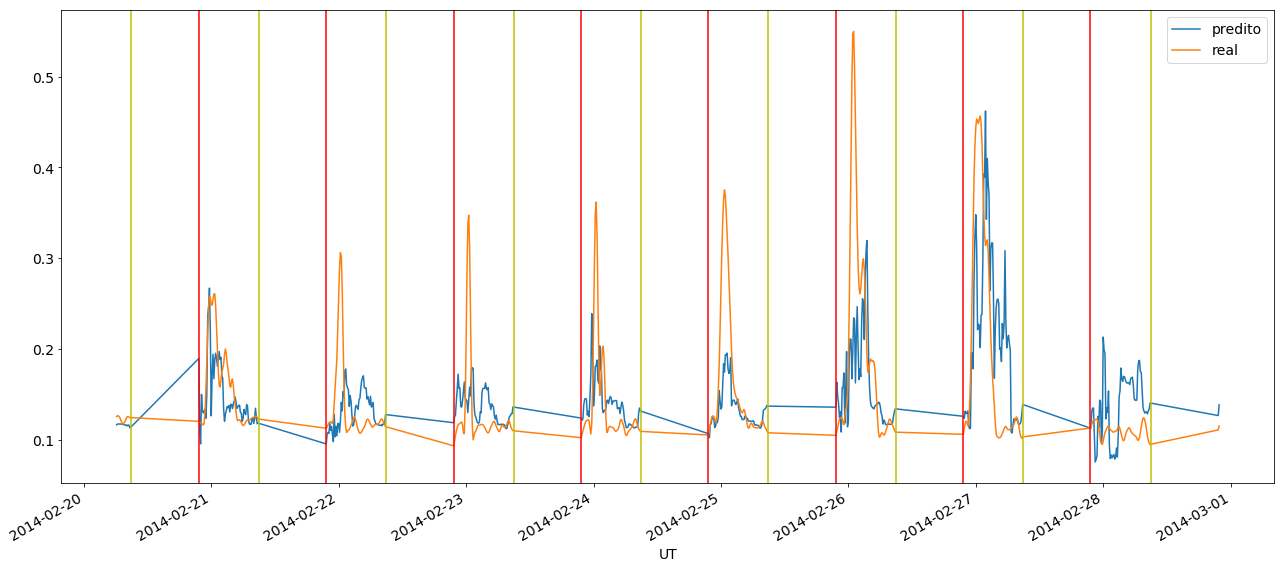


original - gvtec1
Error for the time series sample:
acc             0.875844
f1              0.516282
far             0.327018
fn             51.700000
fp             18.200000
kappa           0.076485
me              0.381461
mse             0.004398
pod             0.419101
precission      0.672982
re             23.897681
recall          0.419101
tn            455.800000
tp             37.300000
tse             1.573288
dtype: float64


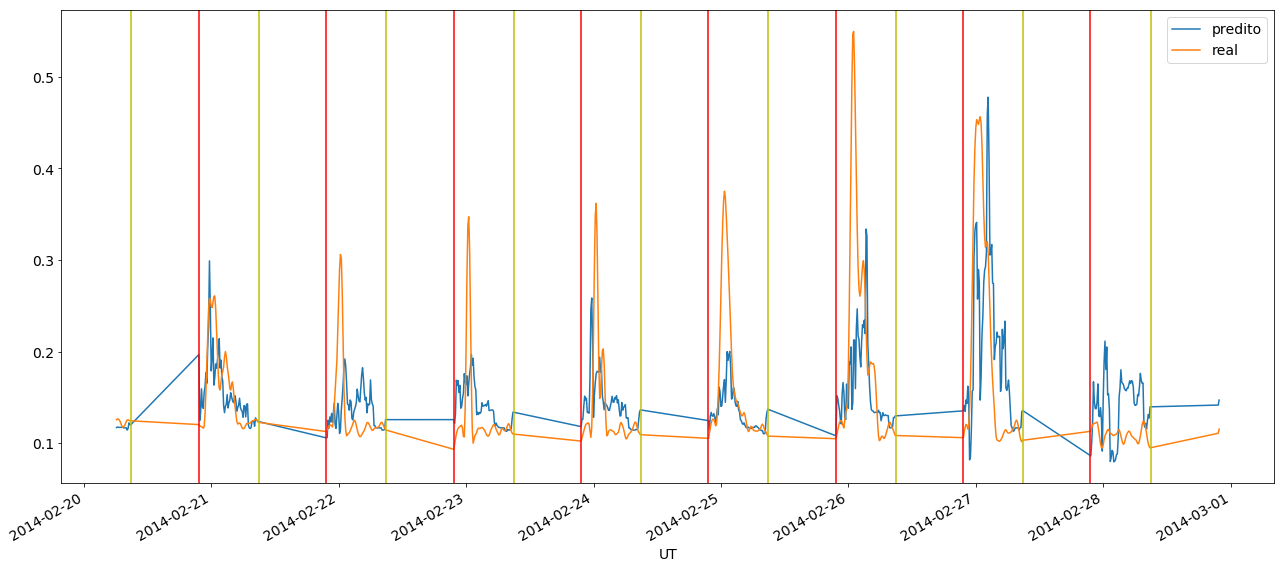


original - gvtec1_dt
Error for the time series sample:
acc             0.871581
f1              0.452308
far             0.304709
fn             59.100000
fp             13.200000
kappa           0.087177
me              0.404577
mse             0.004776
pod             0.335955
precission      0.695291
re             22.453223
recall          0.335955
tn            460.800000
tp             29.900000
tse             1.639761
dtype: float64


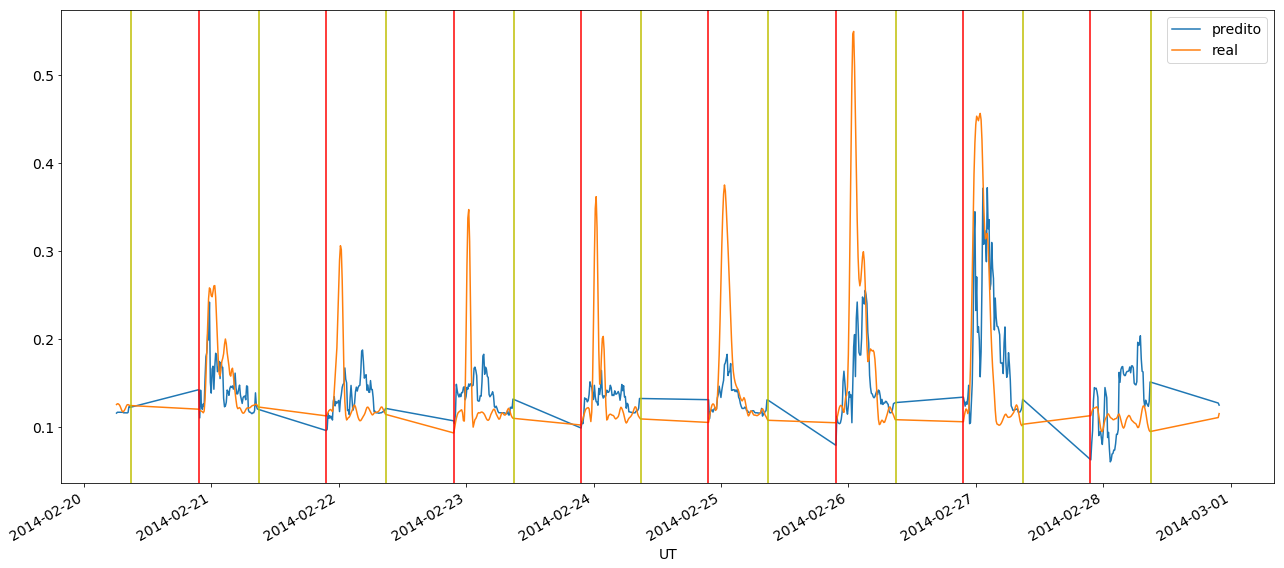


original - gvtec2
Error for the time series sample:
acc             0.822202
f1              0.491466
far             0.551172
fn             40.600000
fp             59.500000
kappa           0.062203
me              0.332296
mse             0.005308
pod             0.543820
precission      0.448828
re             31.748748
recall          0.543820
tn            414.500000
tp             48.400000
tse             1.728576
dtype: float64


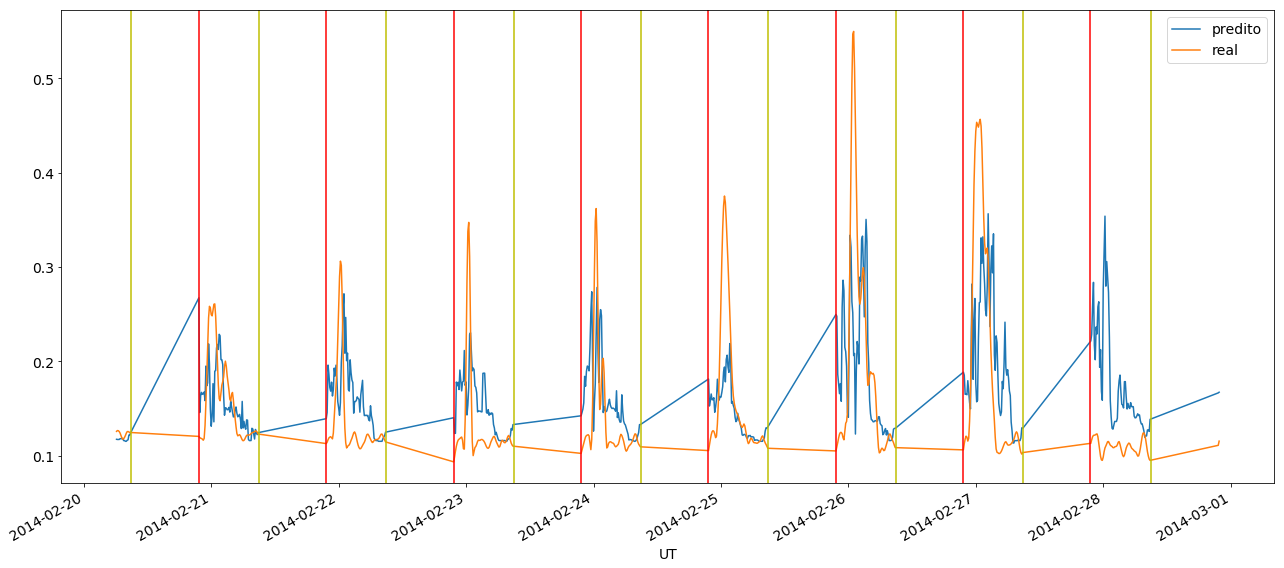


original - gvtec2_dt
Error for the time series sample:
acc             0.874956
f1              0.500477
far             0.320898
fn             53.700000
fp             16.700000
kappa           0.079329
me              0.377393
mse             0.004539
pod             0.396629
precission      0.679102
re             22.930863
recall          0.396629
tn            457.300000
tp             35.300000
tse             1.598407
dtype: float64


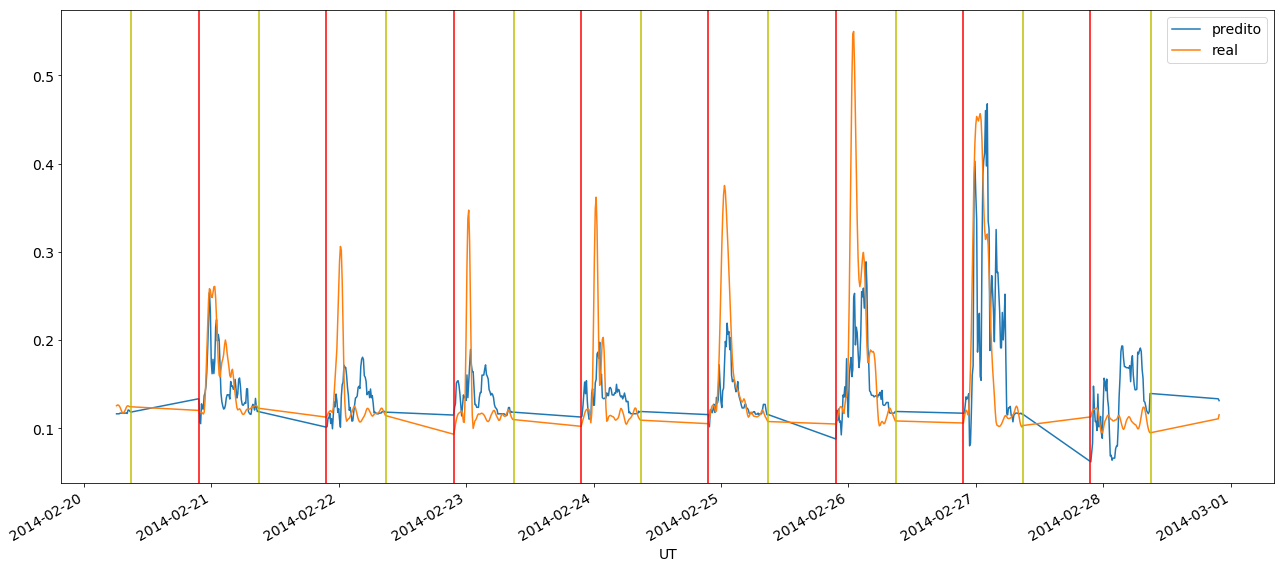


original + tempo
Error for the time series sample:
acc             0.876554
f1              0.513422
far             0.318932
fn             52.300000
fp             17.200000
kappa           0.077353
me              0.367321
mse             0.004460
pod             0.412360
precission      0.681068
re             23.579450
recall          0.412360
tn            456.800000
tp             36.700000
tse             1.584481
dtype: float64


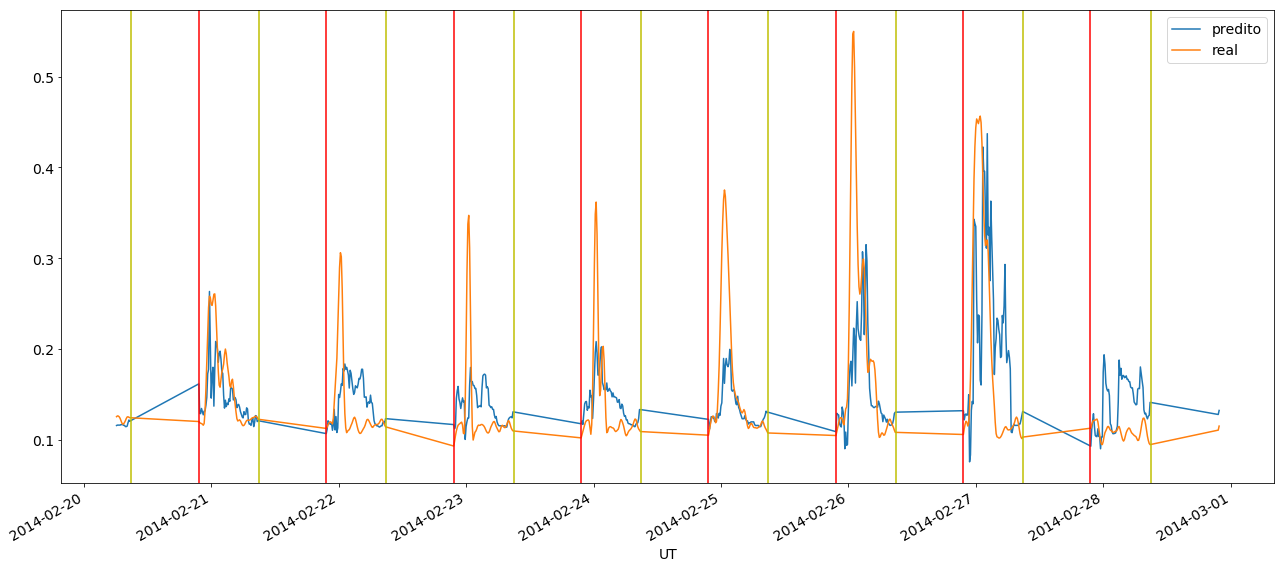


original + gvtec1_dt_lag_9
Error for the time series sample:
acc             0.882060
f1              0.568404
far             0.324590
fn             45.200000
fp             21.200000
kappa           0.067533
me              0.359244
mse             0.004066
pod             0.492135
precission      0.675410
re             23.173339
recall          0.492135
tn            452.800000
tp             43.800000
tse             1.512710
dtype: float64


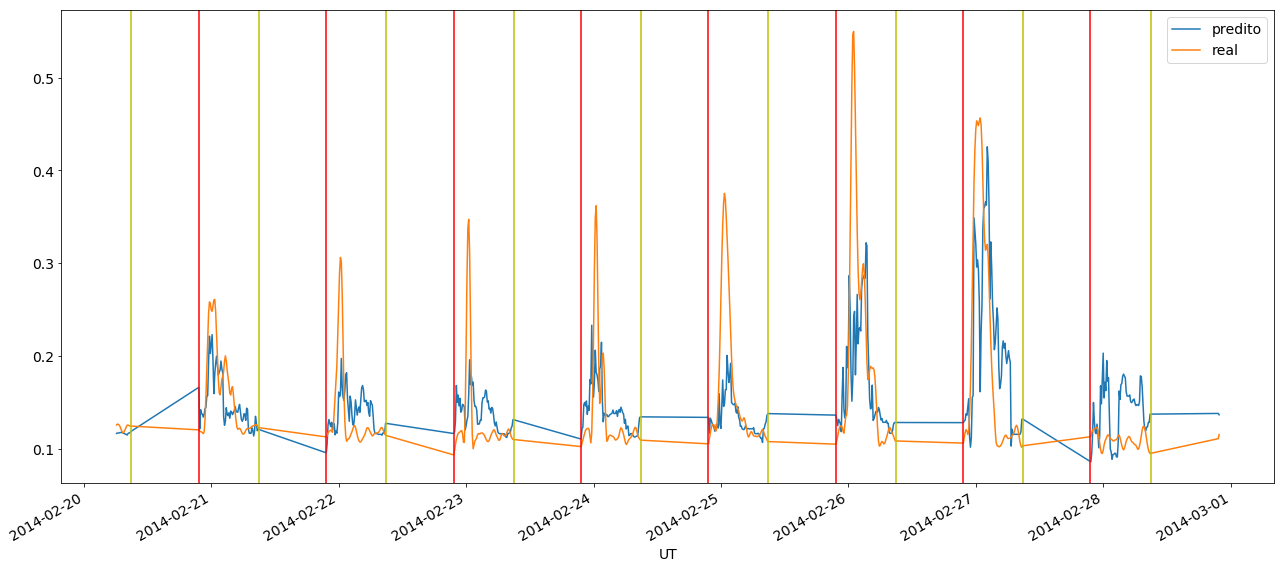


original + gvtec2_dt_lag_20
Error for the time series sample:
acc             0.871048
f1              0.527195
far             0.371477
fn             48.500000
fp             24.100000
kappa           0.071935
me              0.353955
mse             0.004260
pod             0.455056
precission      0.628523
re             23.267228
recall          0.455056
tn            449.900000
tp             40.500000
tse             1.548565
dtype: float64


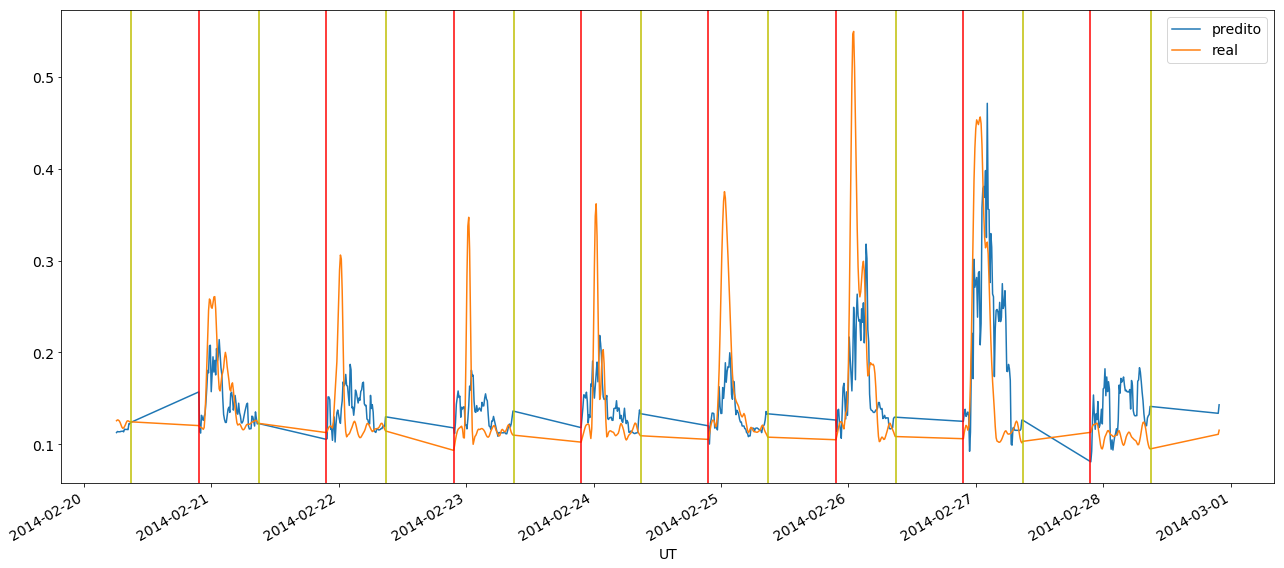


original + lag
Error for the time series sample:
acc             0.873357
f1              0.571710
far             0.386443
fn             41.200000
fp             30.100000
kappa           0.062299
me              0.348725
mse             0.003970
pod             0.537079
precission      0.613557
re             23.645072
recall          0.537079
tn            443.900000
tp             47.800000
tse             1.494809
dtype: float64


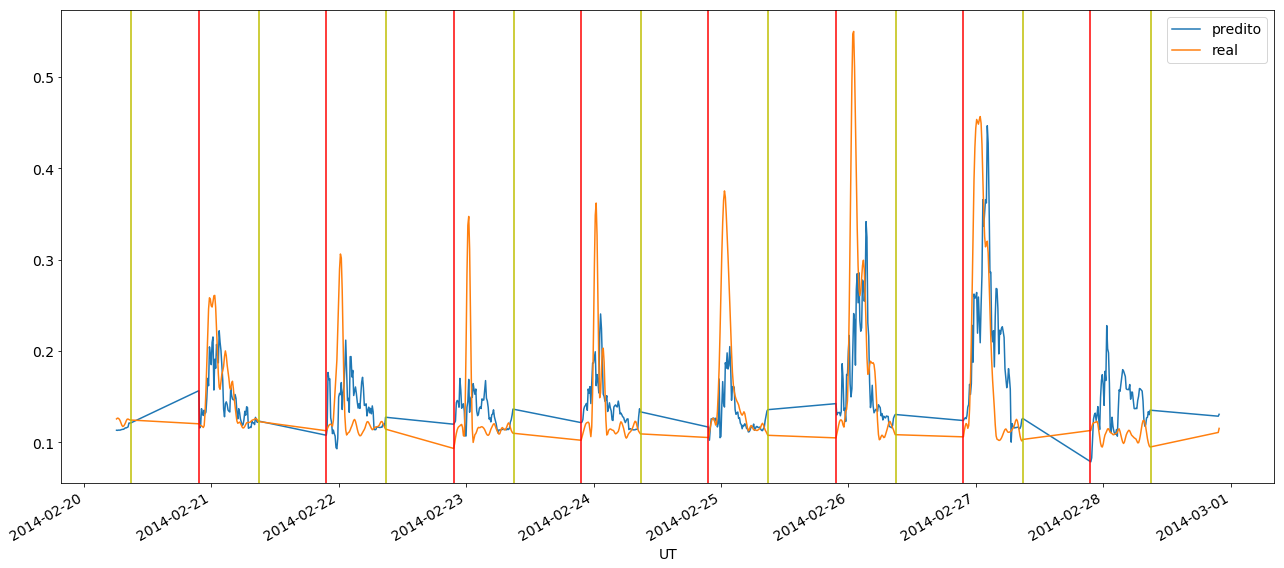


original + mdv1
Error for the time series sample:
acc             0.880284
f1              0.620066
far             0.376953
fn             34.000000
fp             33.400000
kappa           0.053052
me              0.342267
mse             0.004188
pod             0.617978
precission      0.623047
re             26.447540
recall          0.617978
tn            440.600000
tp             55.000000
tse             1.535176
dtype: float64


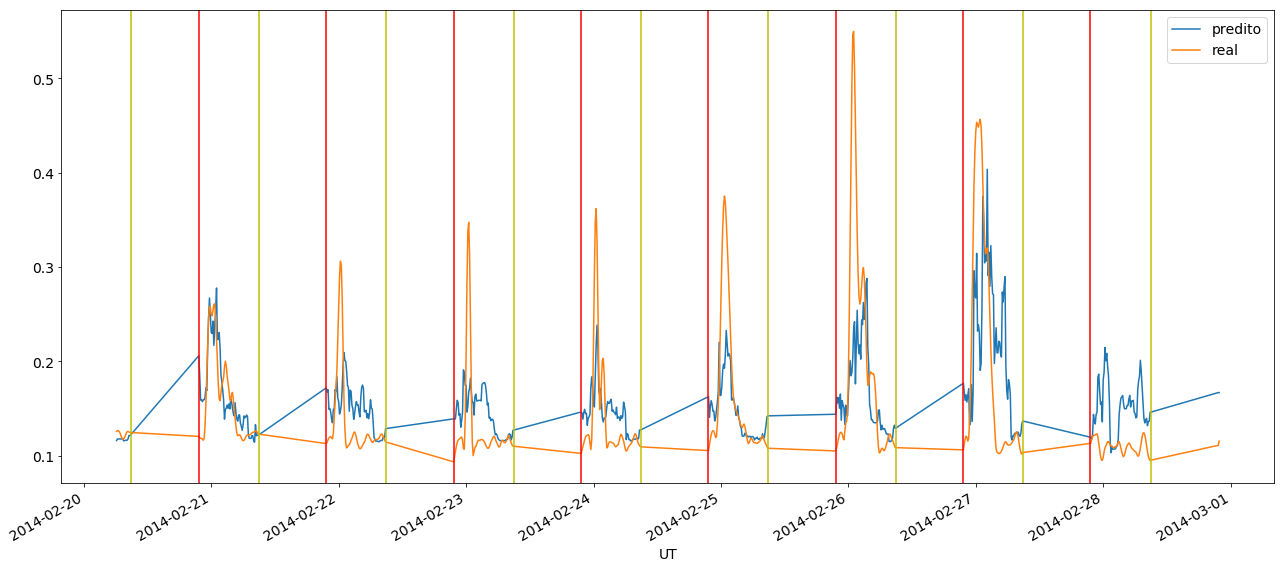


original + mdv2
Error for the time series sample:
acc             0.885790
f1              0.577924
far             0.305776
fn             44.900000
fp             19.400000
kappa           0.067095
me              0.354766
mse             0.004224
pod             0.495506
precission      0.694224
re             24.267518
recall          0.495506
tn            454.600000
tp             44.100000
tse             1.541944
dtype: float64


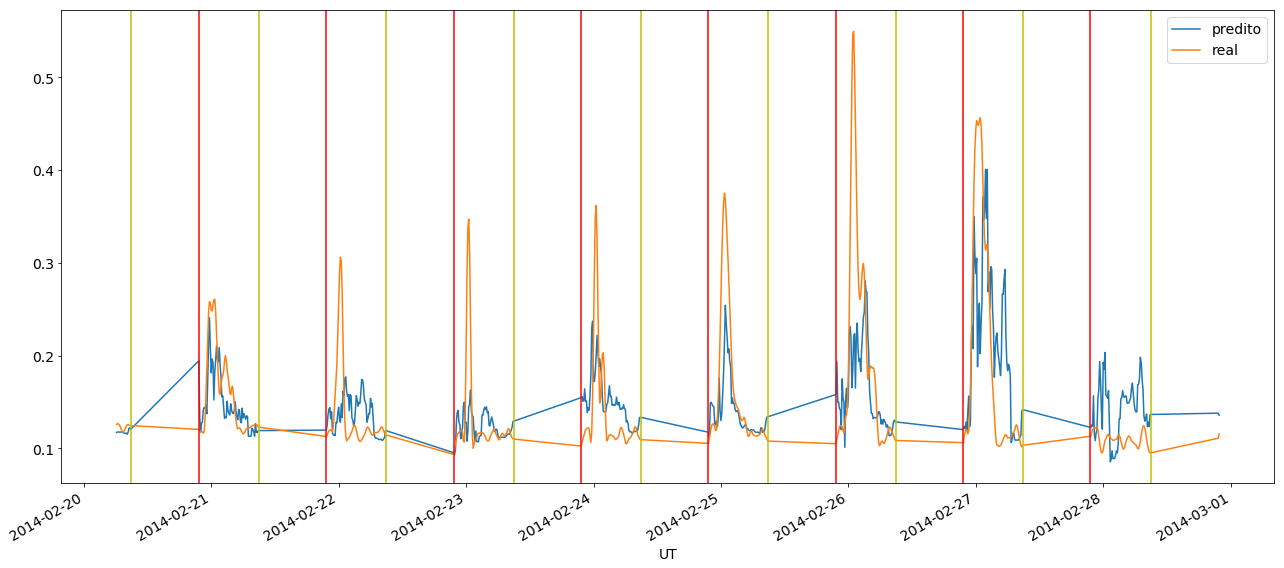


original + tempo + lag
Error for the time series sample:
acc             0.876199
f1              0.582669
far             0.375807
fn             40.300000
fp             29.400000
kappa           0.061038
me              0.351213
mse             0.003978
pod             0.547191
precission      0.624193
re             23.482062
recall          0.547191
tn            444.600000
tp             48.700000
tse             1.495905
dtype: float64


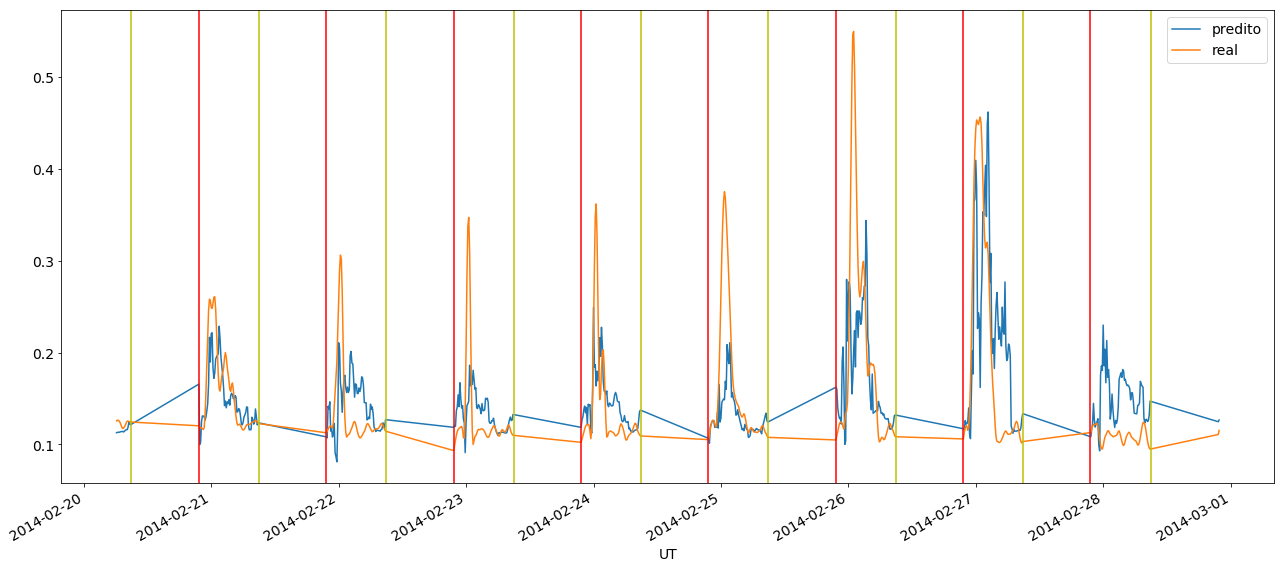


original + tempo + mdv2
Error for the time series sample:
acc             0.887567
f1              0.599744
far             0.312909
fn             41.500000
fp             21.800000
kappa           0.062510
me              0.352767
mse             0.004200
pod             0.533708
precission      0.687091
re             24.592193
recall          0.533708
tn            452.200000
tp             47.500000
tse             1.537285
dtype: float64


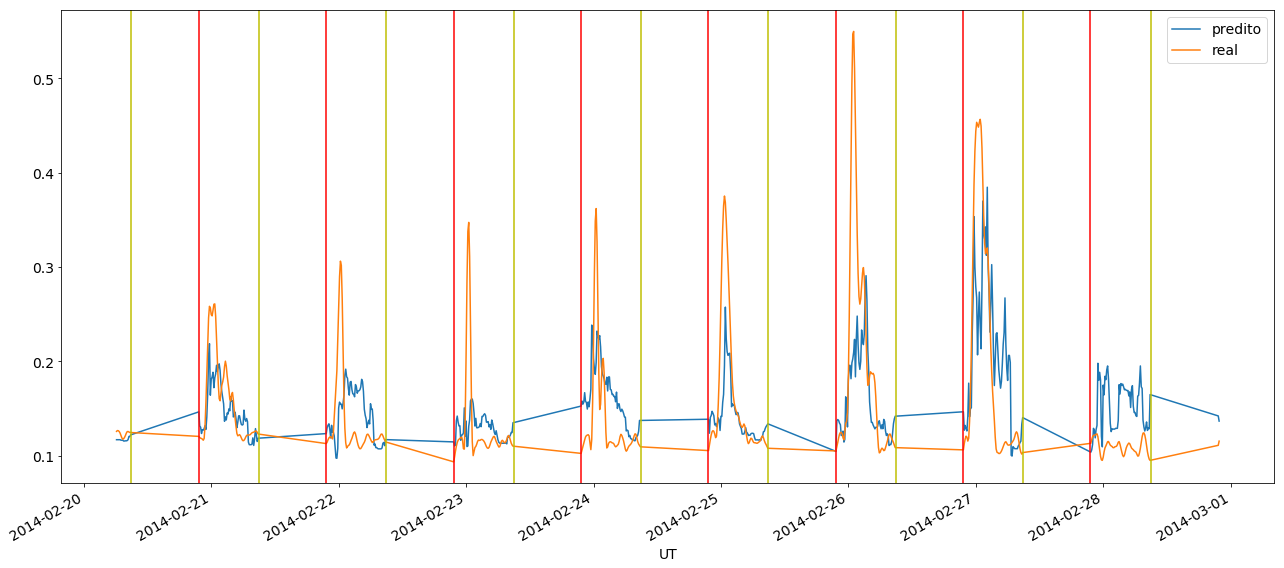


original + tempo + mdv2 + lag
Error for the time series sample:
acc             0.883481
f1              0.621485
far             0.361293
fn             35.000000
fp             30.600000
kappa           0.054216
me              0.335545
mse             0.003842
pod             0.606742
precission      0.638707
re             24.771411
recall          0.606742
tn            443.400000
tp             54.000000
tse             1.470248
dtype: float64


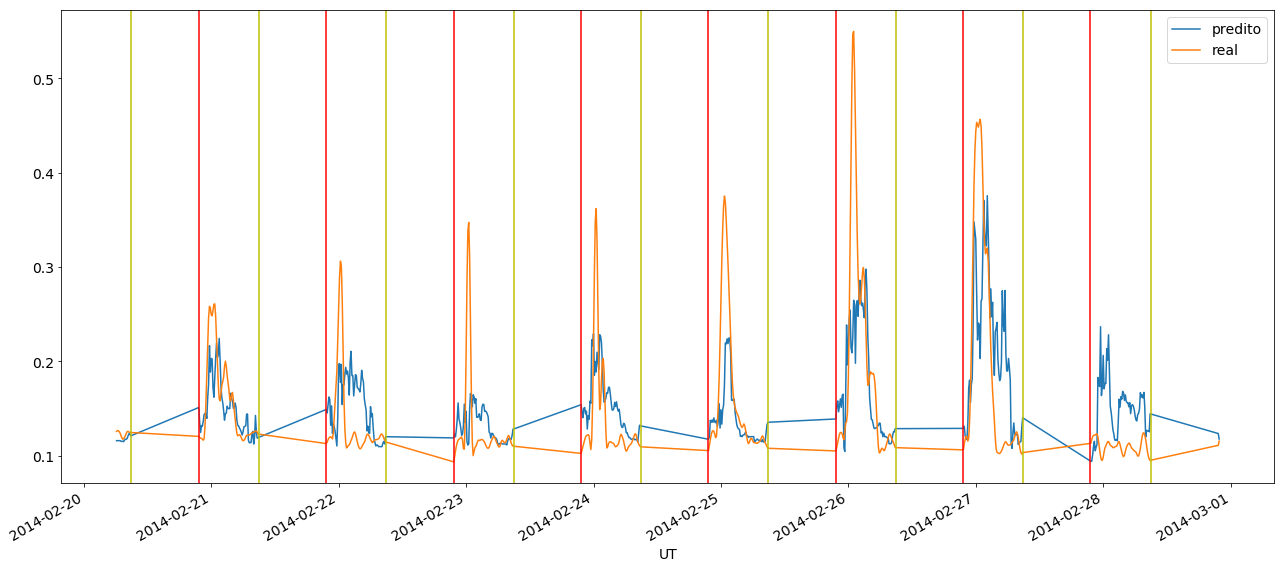


original + tempo + lag + mdv1 + mdv2
Error for the time series sample:
acc             0.869982
f1              0.625821
far             0.425484
fn             27.800000
fp             45.400000
kappa           0.046336
me              0.332942
mse             0.003934
pod             0.687640
precission      0.574516
re             27.928631
recall          0.687640
tn            428.600000
tp             61.200000
tse             1.488042
dtype: float64


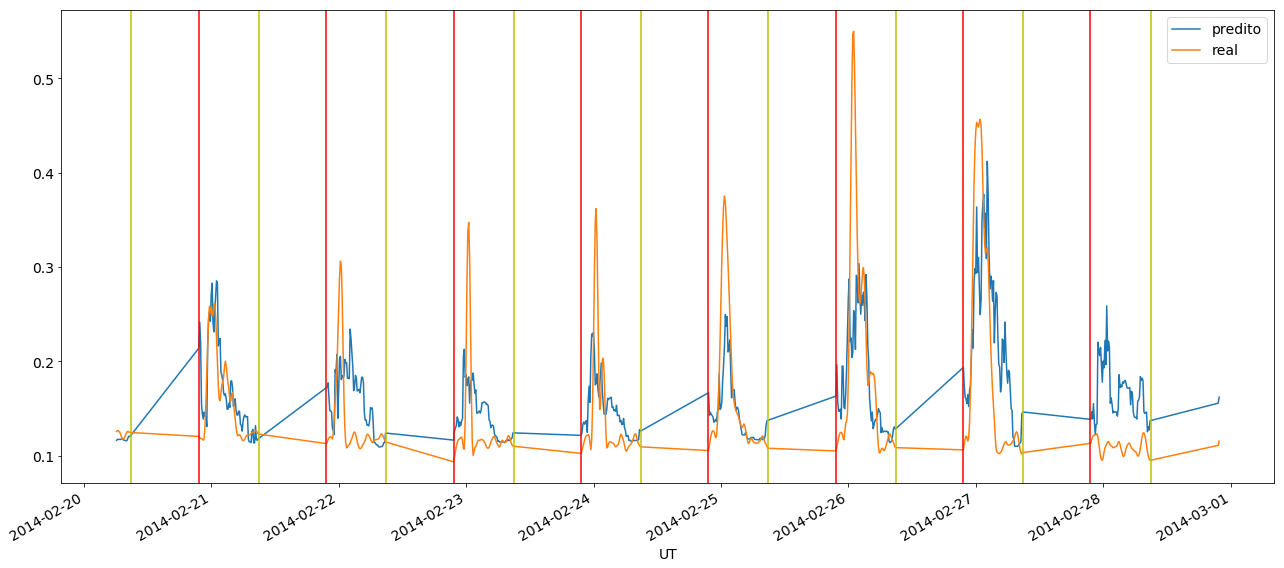


vtec
Error for the time series sample:
acc             0.836767
f1              0.198562
far             0.554880
fn             77.500000
fp             14.400000
kappa           0.112932
me              0.378244
mse             0.005659
pod             0.129213
precission      0.445120
re             28.315614
recall          0.129213
tn            459.600000
tp             11.500000
tse             1.784897
dtype: float64


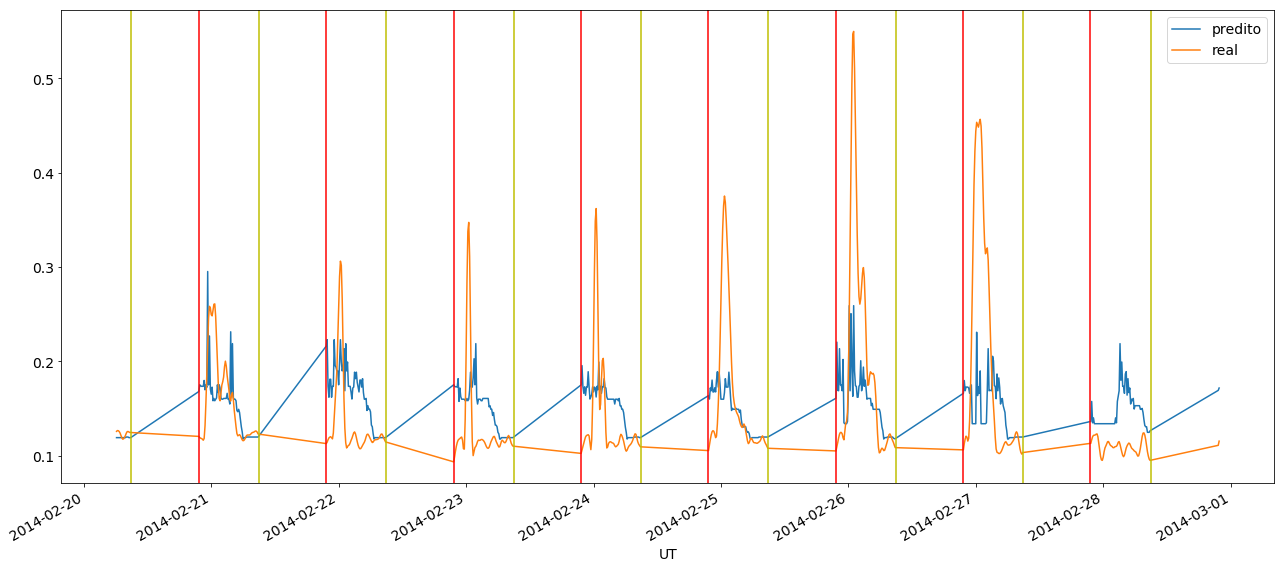


vtec + gvtec1_dt_lag_9
Error for the time series sample:
acc             0.821492
f1              0.469664
far             0.557392
fn             44.400000
fp             56.100000
kappa           0.066469
me              0.344688
mse             0.005473
pod             0.501124
precission      0.442608
re             32.893862
recall          0.501124
tn            417.900000
tp             44.600000
tse             1.755257
dtype: float64


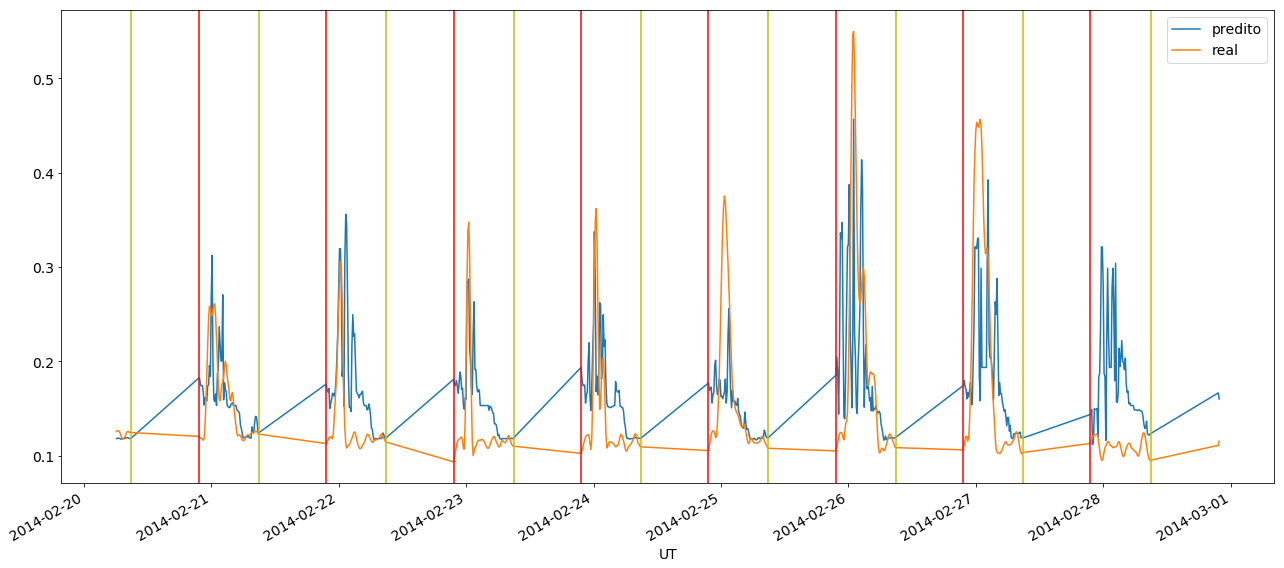


vtec + gvtec2_dt_lag_20
Error for the time series sample:
acc             0.847425
f1              0.516553
far             0.482265
fn             43.100000
fp             42.800000
kappa           0.064840
me              0.330017
mse             0.003857
pod             0.515730
precission      0.517735
re             25.002761
recall          0.515730
tn            431.200000
tp             45.900000
tse             1.473545
dtype: float64


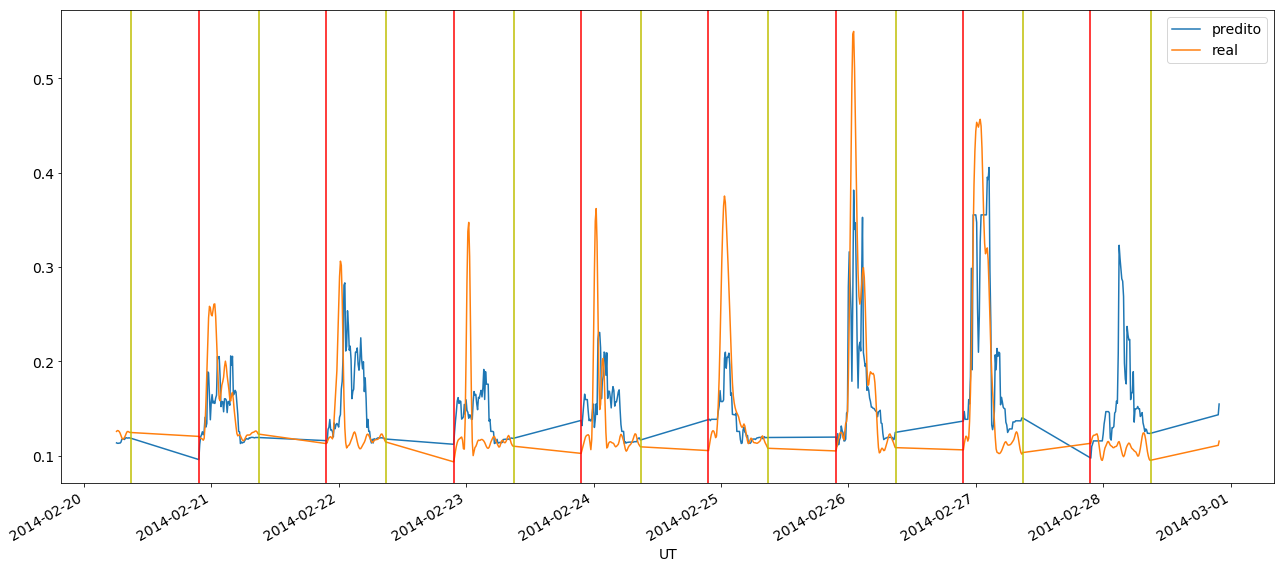


vtec + vtec_dt + vtec_dt2
Error for the time series sample:
acc             0.838721
f1              0.516598
far             0.508243
fn             40.400000
fp             50.400000
kappa           0.061793
me              0.316668
mse             0.004851
pod             0.546067
precission      0.491757
re             29.811825
recall          0.546067
tn            423.600000
tp             48.600000
tse             1.652457
dtype: float64


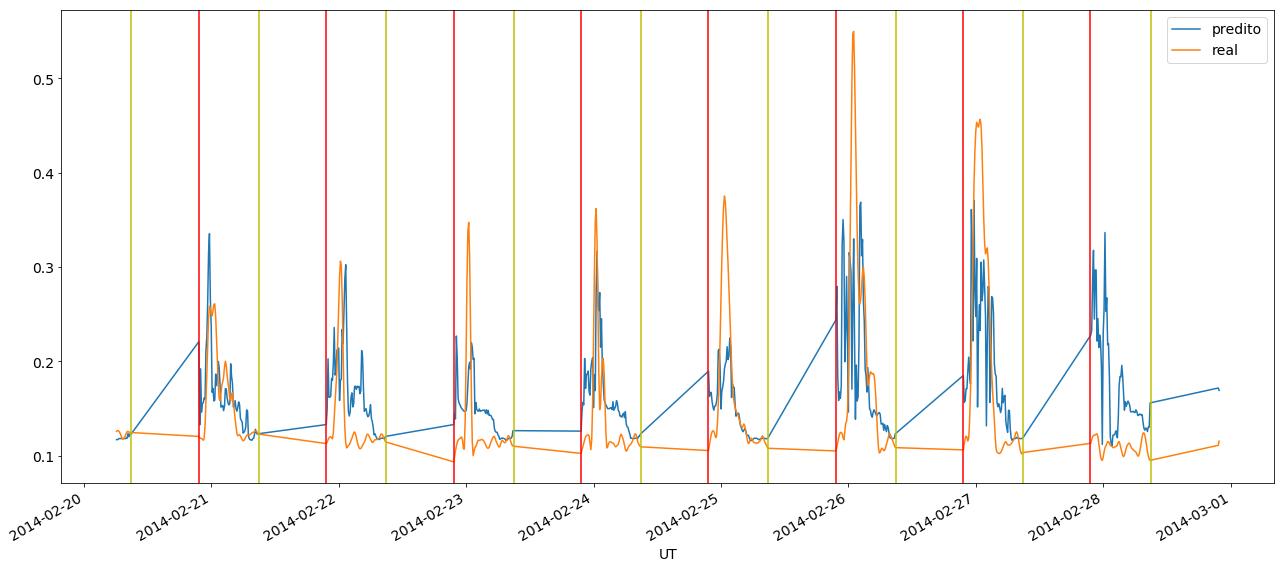


vtec + gvtec1 + gvtec2
Error for the time series sample:
acc             0.845471
f1              0.302884
far             0.469323
fn             70.100000
fp             16.900000
kappa           0.102095
me              0.414622
mse             0.005727
pod             0.212360
precission      0.530677
re             23.785580
recall          0.212360
tn            457.100000
tp             18.900000
tse             1.795445
dtype: float64


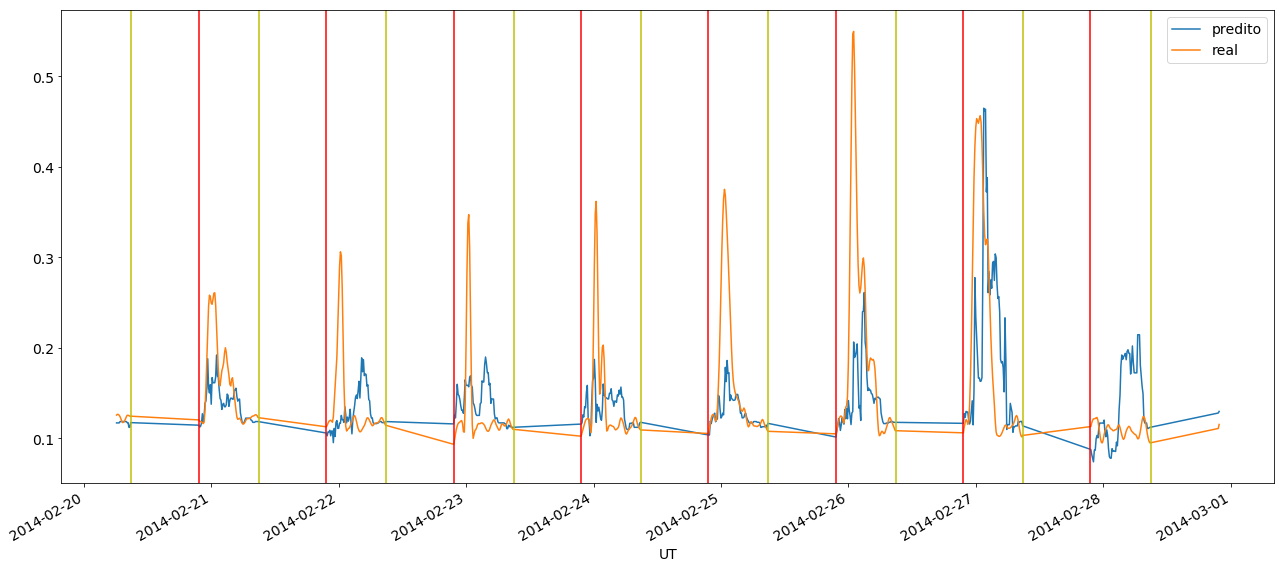


vtec + tempo
Error for the time series sample:
acc             0.826998
f1              0.490683
far             0.540187
fn             42.100000
fp             55.300000
kappa           0.063822
me              0.337132
mse             0.005046
pod             0.526966
precission      0.459813
re             29.564483
recall          0.526966
tn            418.700000
tp             46.900000
tse             1.685440
dtype: float64


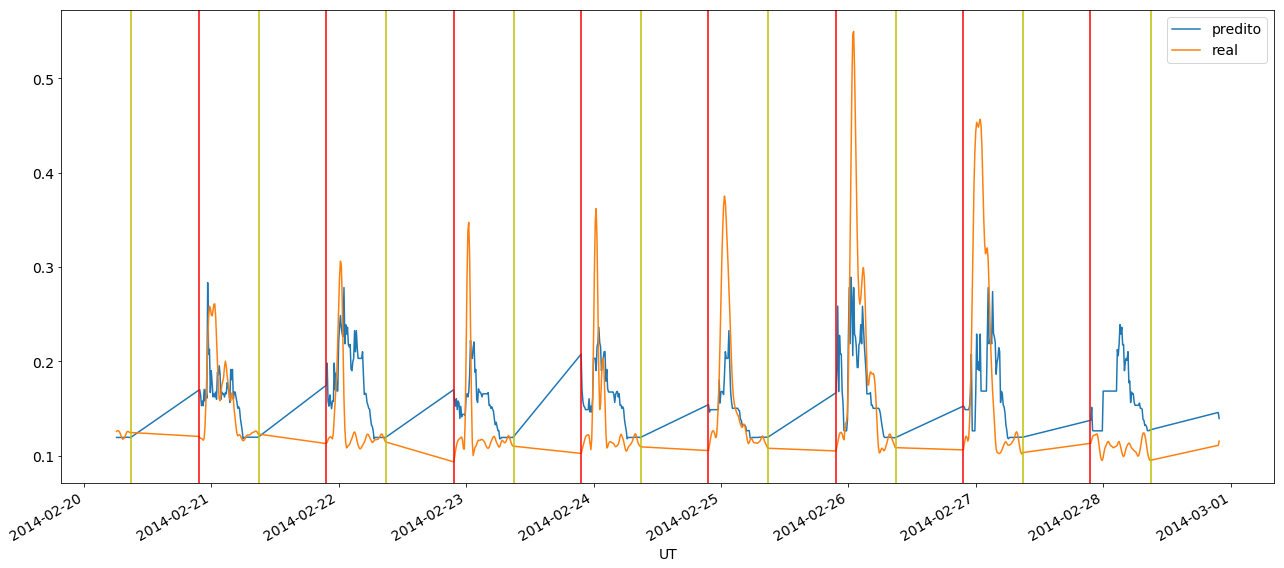


vtec + tempo + mdv1
Error for the time series sample:
acc             0.785790
f1              0.484394
far             0.608712
fn             32.400000
fp             88.200000
kappa           0.055162
me              0.278172
mse             0.006094
pod             0.635955
precission      0.391288
re             36.381806
recall          0.635955
tn            385.800000
tp             56.600000
tse             1.850663
dtype: float64


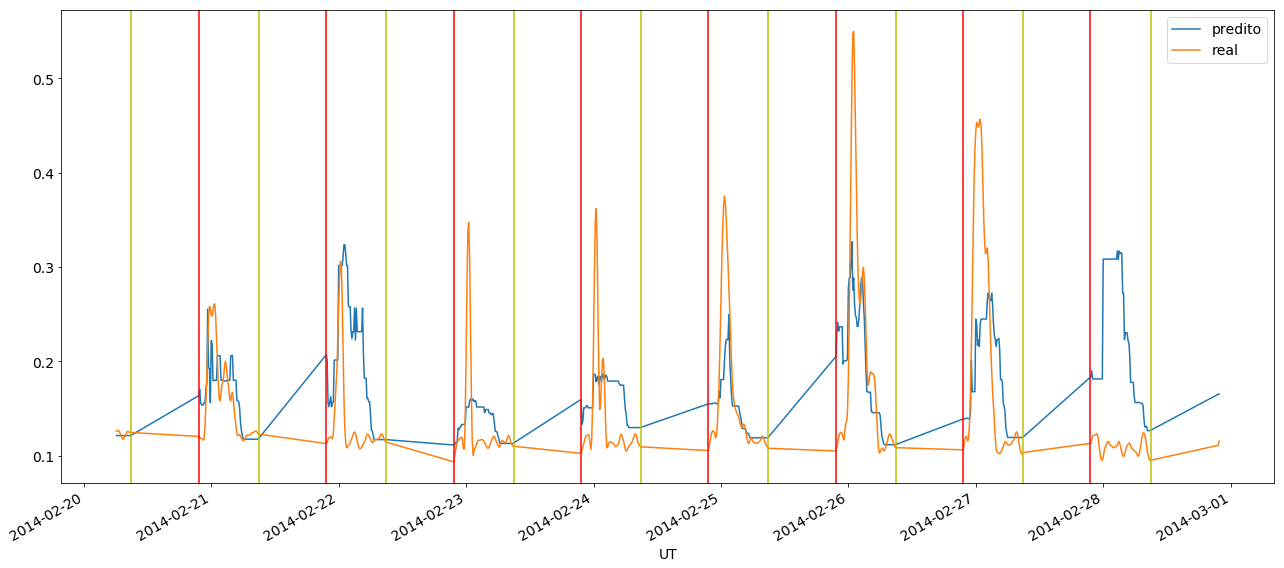


vtec + tempo + lag
Error for the time series sample:
acc             0.828774
f1              0.543099
far             0.529925
fn             31.700000
fp             64.700000
kappa           0.052662
me              0.307812
mse             0.004311
pod             0.643820
precission      0.470075
re             27.452525
recall          0.643820
tn            409.300000
tp             57.300000
tse             1.557459
dtype: float64


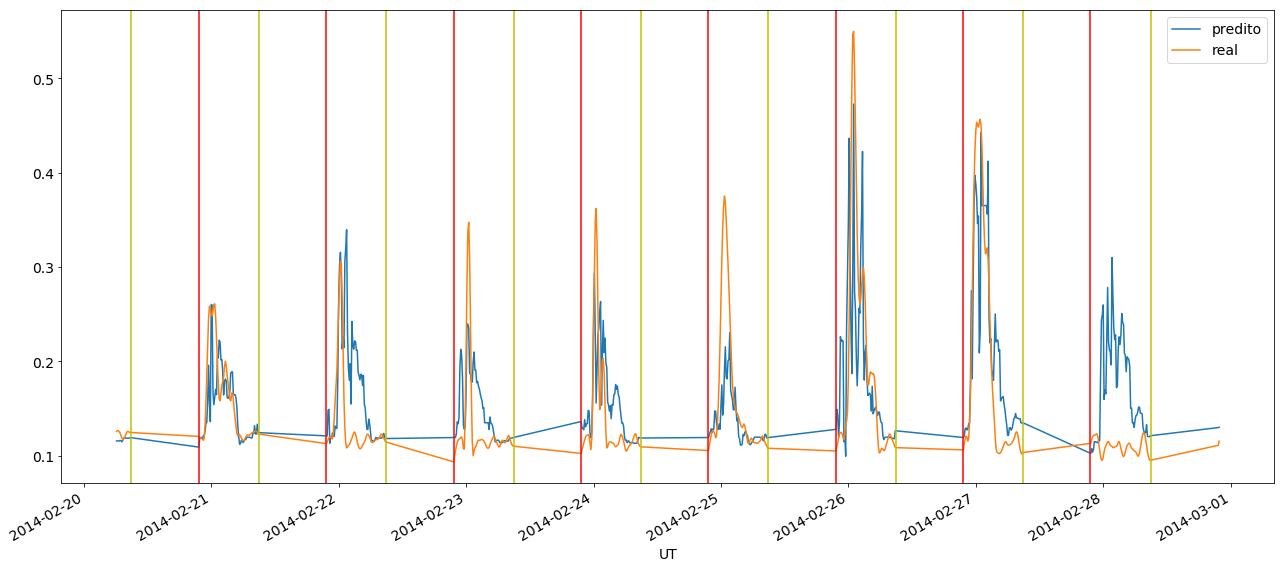


vtec + tempo + lag + mdv1
Error for the time series sample:
acc             0.821314
f1              0.571117
far             0.539738
fn             22.000000
fp             78.600000
kappa           0.044087
me              0.273437
mse             0.004527
pod             0.752809
precission      0.460262
re             31.107919
recall          0.752809
tn            395.400000
tp             67.000000
tse             1.596381
dtype: float64


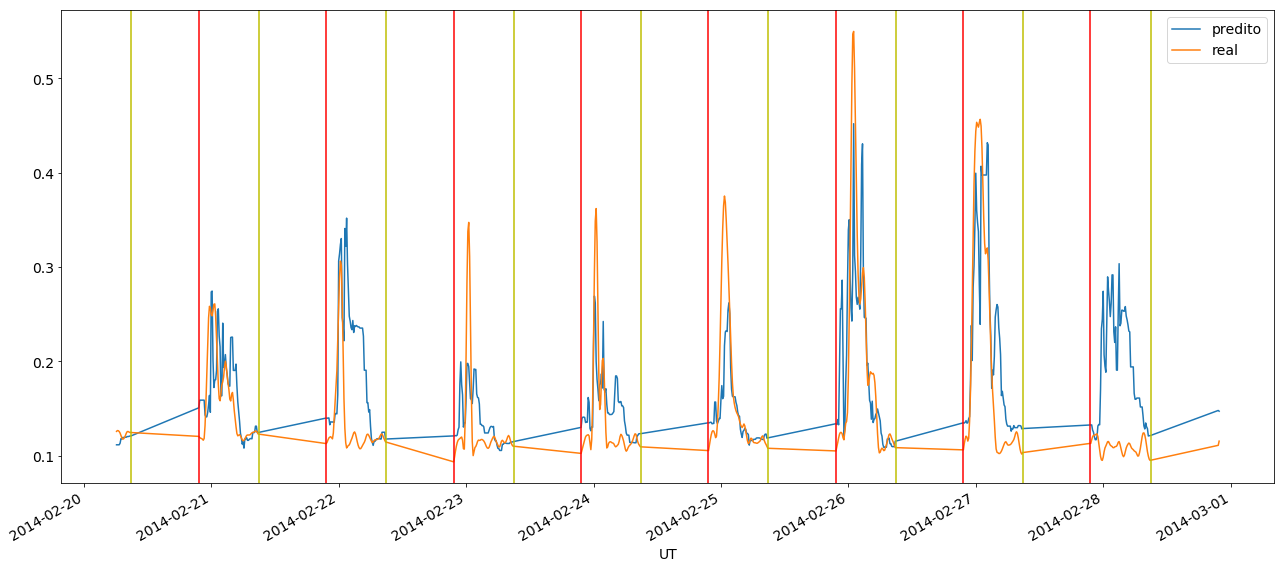


vtec + tempo + lag + mdv2
Error for the time series sample:
acc             0.832327
f1              0.543201
far             0.521742
fn             32.900000
fp             61.500000
kappa           0.053758
me              0.302616
mse             0.004431
pod             0.630337
precission      0.478258
re             29.143841
recall          0.630337
tn            412.500000
tp             56.100000
tse             1.579118
dtype: float64


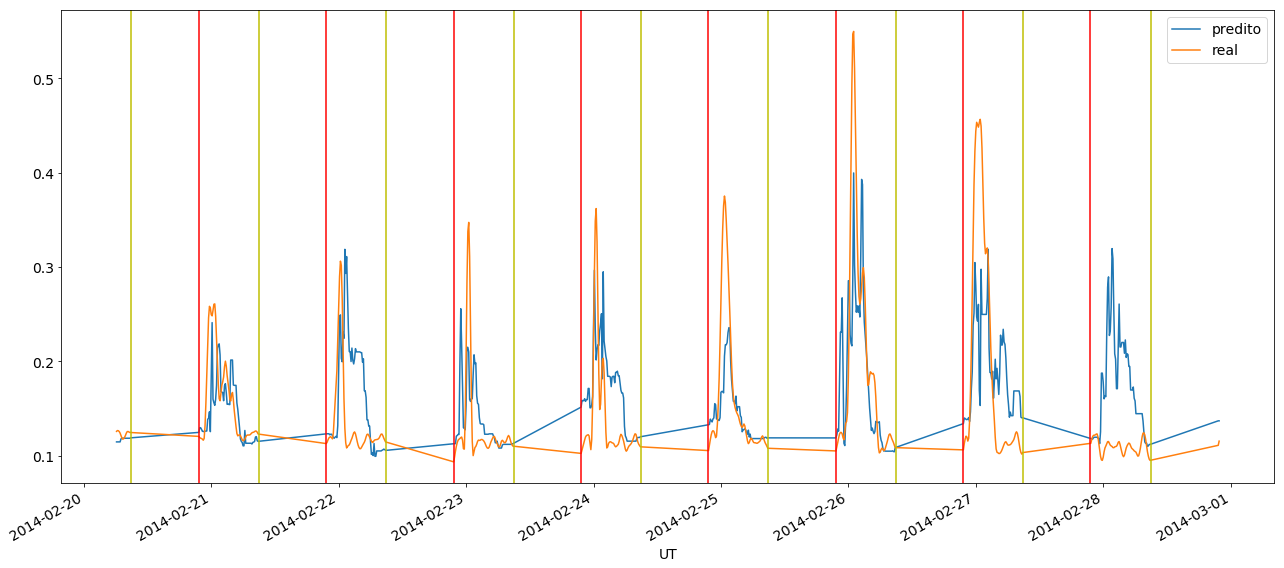


vtec + tempo + lag + mdv1 + mdv2
Error for the time series sample:
acc             0.809591
f1              0.550752
far             0.560559
fn             23.300000
fp             83.900000
kappa           0.046094
me              0.291381
mse             0.004619
pod             0.738202
precission      0.439441
re             32.532122
recall          0.738202
tn            390.100000
tp             65.700000
tse             1.612269
dtype: float64


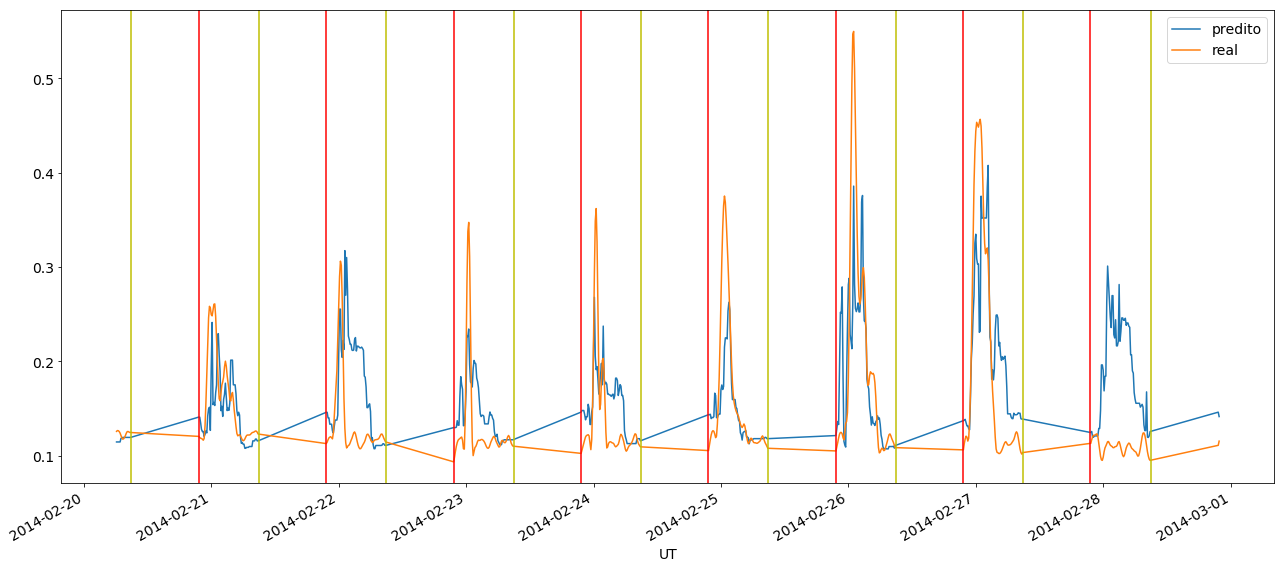

In [6]:
errors = []
for i in set_tests:
    print(i.name)
    dict_error = generate_and_avaliate_model(model=XGBRegressor,
                                             df=df,
                                             instances_set=list(i.set),
                                             target='s4',
                                             save=True,
                                             file_to_save_model='./images/09_analise_all_xgboost/' + i.name + '.eps ')
    dict_error['name'] = i.name
    errors.append(dict_error)
    print()

In [7]:
df = pd.DataFrame(errors) 
df.index = df['name']
del df['name']
df = df[['tp', 'tn', 'fp', 'fn', 're', 'pod', 'far', 'acc', 'precission', 'recall', 'f1', 'kappa', 'me', 'tse', 'mse']]
pd.set_option('precision', 4)

In [8]:
df

,tp,tn,fp,fn,re,pod,far,acc,precission,recall,f1,kappa,me,tse,mse
name,,,,,,,,,,,,,,,
original,34.8,456.1,17.9,54.2,23.1251,0.3910,0.3349,0.8719,0.6651,0.3910,0.4908,0.0800,0.3731,1.5850,0.0045
original - vtec,47.4,435.1,38.9,41.6,30.0935,0.5326,0.4500,0.8570,0.5500,0.5326,0.5403,0.0630,0.3336,1.6422,0.0048
original - vtec_dt,37.8,456.1,17.9,51.2,23.3860,0.4247,0.3209,0.8773,0.6791,0.4247,0.5219,0.0758,0.3604,1.5923,0.0045
original - gvtec1,37.3,455.8,18.2,51.7,23.8977,0.4191,0.3270,0.8758,0.6730,0.4191,0.5163,0.0765,0.3815,1.5733,0.0044
original - gvtec1_dt,29.9,460.8,13.2,59.1,22.4532,0.3360,0.3047,0.8716,0.6953,0.3360,0.4523,0.0872,0.4046,1.6398,0.0048
original - gvtec2,48.4,414.5,59.5,40.6,31.7487,0.5438,0.5512,0.8222,0.4488,0.5438,0.4915,0.0622,0.3323,1.7286,0.0053
original - gvtec2_dt,35.3,457.3,16.7,53.7,22.9309,0.3966,0.3209,0.8750,0.6791,0.3966,0.5005,0.0793,0.3774,1.5984,0.0045
original + tempo,36.7,456.8,17.2,52.3,23.5794,0.4124,0.3189,0.8766,0.6811,0.4124,0.5134,0.0774,0.3673,1.5845,0.0045
original + gvtec1_dt_lag_9,43.8,452.8,21.2,45.2,23.1733,0.4921,0.3246,0.8821,0.6754,0.4921,0.5684,0.0675,0.3592,1.5127,0.0041
